In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../utils/")
from train_tools import pre_process, train_qg_pfn
from sklearn.metrics import roc_auc_score, roc_curve
from helpers import *

In [3]:
base_dir = "/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/"

In [11]:
fname_gg = base_dir+'H2gg-CF3.0CA3.0-sqg0100/total.root'
fname_qq = base_dir+'H2qq-CF3.0CA3.0-sqg0100-esq0011/total.root'
X, Y = pre_process(fname_qq,fname_gg,nev_max=75000)
z = np.array([[p[0] for p in jet] for jet in X])
mults = np.array([np.sum([1 if p[0] > 0 else 0 for p in jet]) for jet in X])
pfn_out = train_qg_pfn(fname_qq,fname_gg,n_epoch=3,nev_max=75000)

Loaded files at 0.1381208896636963
Read in arrays at 2.6836445331573486
Cleaned events at 2.8386220932006836
Limited max events at 2.838719129562378
Made quark/gluon input arrays at 7.414186239242554
Finished preprocessing at 17.140031814575195
Loaded files at 0.11203861236572266
Read in arrays at 2.6048107147216797
Cleaned events at 2.760159492492676
Limited max events at 2.7602572441101074
qmaxmult = 15, gmaxmult = 13
Made quark/gluon input arrays at 7.2524573802948
Finished preprocessing at 17.081165552139282
Done train/val/test split at 17.107269287109375
Model summary:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 3)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistribute

Optimal AUC: 0.5652002969777778
Multiplicity AUC: 0.5598461827555555


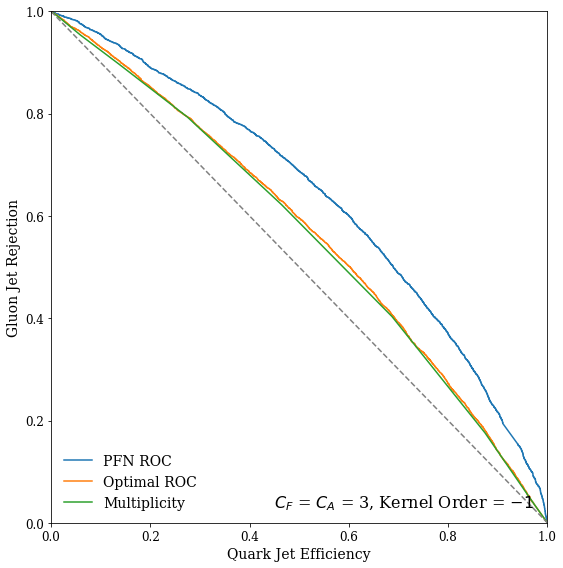

In [13]:
optimal = np.sum(z**2,axis=1)
optimal_roc = roc_curve(Y[:,1],-optimal)
optimal_auc = roc_auc_score(Y[:,1],-optimal)
mult_roc = roc_curve(Y[:,1],mults)
mult_auc = roc_auc_score(Y[:,1],mults)
print("Optimal AUC: "+str(optimal_auc))
print("Multiplicity AUC: "+str(mult_auc))
plot_rocs(pfn_out,optimal_roc,mult_roc)

In [21]:
exps = np.arange(-3,3.1,step=0.1)
aucs = []
for exp in exps:
    arr = np.sum(nk(z,exp),axis=1)
    auc = roc_auc_score(Y[:,1],arr)
    if auc < 0.5:
        auc = 1-auc
    aucs.append(auc)

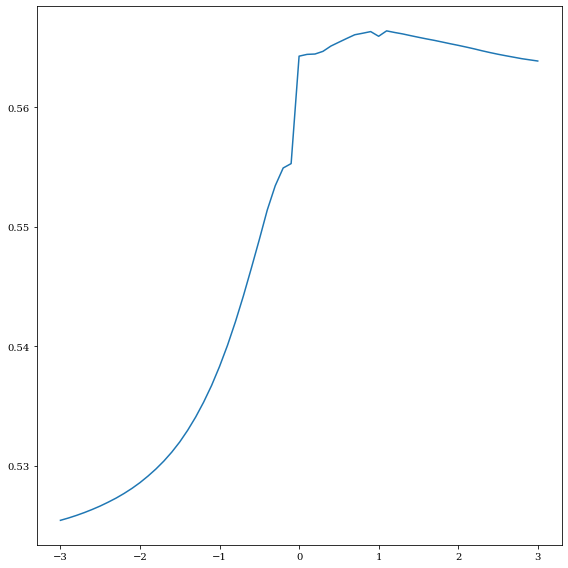

In [22]:
plt.plot(exps,aucs)

In [4]:
fname_gg = base_dir+'H2gg-CF3.0CA3.0-sqg0100/total.root'
fname_qq = base_dir+'H2qq-CF3.0CA3.0-sqg0100-esq1000/total.root'
X, Y = pre_process(fname_qq,fname_gg,nev_max=75000)
z = np.array([[p[0] for p in jet] for jet in X])
mults = np.array([np.sum([1 if p[0] > 0 else 0 for p in jet]) for jet in X])
pfn_out = train_qg_pfn(fname_qq,fname_gg,n_epoch=3,nev_max=75000)

Loaded files at 0.1648728847503662
Read in arrays at 2.871168375015259
Cleaned events at 3.0340726375579834
Limited max events at 3.0341925621032715
Made quark/gluon input arrays at 8.065253496170044
Finished preprocessing at 17.96773934364319
Loaded files at 0.11206912994384766
Read in arrays at 2.7144832611083984
Cleaned events at 2.8719563484191895
Limited max events at 2.872051477432251
qmaxmult = 15, gmaxmult = 13
Made quark/gluon input arrays at 7.611400604248047
Finished preprocessing at 17.494308710098267
Done train/val/test split at 17.521694660186768
Model summary:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 3)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistribut

Optimal AUC: 0.5466874739555556
Multiplicity AUC: 0.5717218294222222


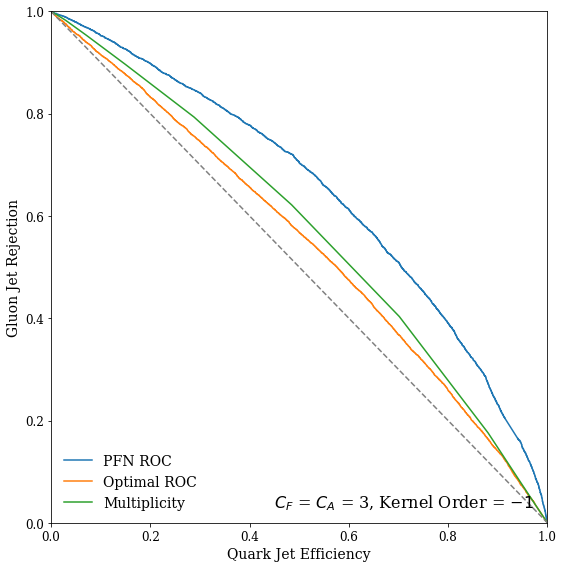

In [6]:
optimal = np.sum(nk(z,-1),axis=1)
optimal_roc = roc_curve(Y[:,1],optimal)
optimal_auc = roc_auc_score(Y[:,1],optimal)
mult_roc = roc_curve(Y[:,1],mults)
mult_auc = roc_auc_score(Y[:,1],mults)
print("Optimal AUC: "+str(optimal_auc))
print("Multiplicity AUC: "+str(mult_auc))
plot_rocs(pfn_out,optimal_roc,mult_roc)

In [9]:
exps = np.linspace(-3,3,61)
aucs = []
for exp in exps:
    print(exp)
    arr = np.sum(nk(z,exp),axis=1)
    auc = roc_auc_score(Y[:,1],arr)
    if auc < 0.5:
        auc = 1-auc
    aucs.append(auc)

-3.0
-2.9
-2.8
-2.7
-2.6
-2.5
-2.4
-2.3
-2.2
-2.1
-2.0
-1.9
-1.7999999999999998
-1.7
-1.5999999999999999
-1.5
-1.4
-1.2999999999999998
-1.2
-1.0999999999999999
-1.0
-0.8999999999999999
-0.7999999999999998
-0.6999999999999997
-0.5999999999999996
-0.5
-0.3999999999999999
-0.2999999999999998
-0.19999999999999973
-0.09999999999999964
0.0
0.10000000000000009
0.20000000000000018
0.30000000000000027
0.40000000000000036
0.5
0.6000000000000001
0.7000000000000002
0.8000000000000003
0.9000000000000004
1.0
1.1000000000000005
1.2000000000000002
1.2999999999999998
1.4000000000000004
1.5
1.6000000000000005
1.7000000000000002
1.8000000000000007
1.9000000000000004
2.0
2.1000000000000005
2.2
2.3000000000000007
2.4000000000000004
2.5
2.6000000000000005
2.7
2.8000000000000007
2.9000000000000004
3.0


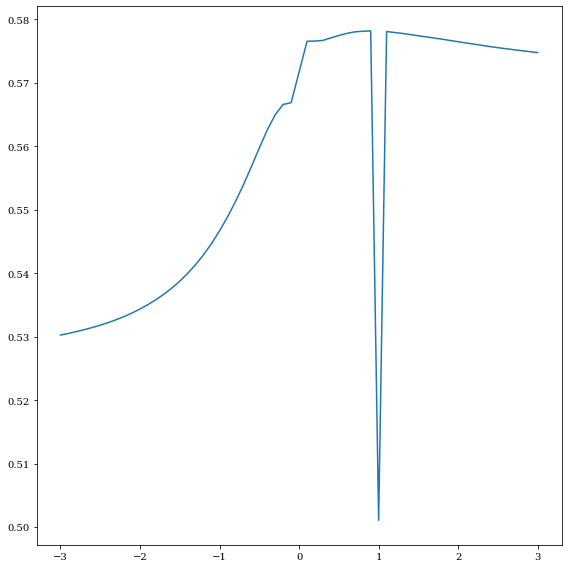

In [10]:
plt.plot(exps,aucs)

In [5]:
fname_gg = base_dir+'H2gg-CF3.0CA3.0-sqg0100/total.root'
fname_qq = base_dir+'H2qq-CF3.0CA3.0-sqg1000-esqg0011/total.root'
X, Y = pre_process(fname_qq,fname_gg,nev_max=75000)
optimal = np.array([np.sum([np.log(1/p[0]) + p[0] + p[0]**2 if p[0] > 0 else 0 for p in jet]) for jet in X])
optimal_roc = roc_curve(Y[:,1],optimal)
optimal_auc = roc_auc_score(Y[:,1],optimal)
mults = np.array([np.sum([1 if p[0] > 0 else 0 for p in jet]) for jet in X])
mult_roc = roc_curve(Y[:,1],mults)
mult_auc = roc_auc_score(Y[:,1],mults)
print("Optimal AUC: "+str(optimal_auc))
print("Multiplicity AUC: "+str(mult_auc))
pfn_out = train_qg_pfn(fname_qq,fname_gg,n_epoch=3,nev_max=75000)

Loaded files at 0.16075491905212402
Read in arrays at 2.815521717071533
Limited max events at 2.8156096935272217
Cleaned events at 2.961313009262085
Made quark/gluon input arrays at 8.71205735206604
Finished preprocessing at 17.916860580444336
Optimal AUC: 0.8736119875816594
Multiplicity AUC: 0.8752056479704713
Loaded files at 0.11808657646179199
Read in arrays at 2.6802048683166504
Limited max events at 2.680293321609497
Cleaned events at 2.798424482345581
qmaxmult = 20, gmaxmult = 13
Made quark/gluon input arrays at 8.497505187988281
Finished preprocessing at 17.718682050704956
Done train/val/test split at 17.749740600585938
Model summary:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 3)      0                                            
_____________________________________________________

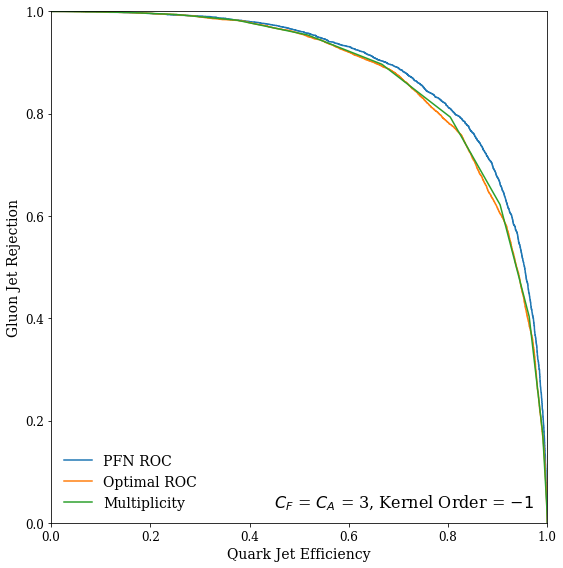

In [6]:
plot_rocs(pfn_out,optimal_roc,mult_roc)

In [11]:
fname_gg = base_dir+'H2gg-CF3.0CA3.0-sqg0100/total.root'
fname_qq = base_dir+'H2qq-CF3.0CA3.0-sqg0100-esqg0011/total.root'
X, Y = pre_process(fname_qq,fname_gg,nev_max=75000)
optimal = np.array([np.sum([p[0] + p[0]**2 if p[0] > 0 else 0 for p in jet]) for jet in X])
optimal_roc = roc_curve(Y[:,1],-optimal)
optimal_auc = roc_auc_score(Y[:,1],-optimal)
mults = np.array([np.sum([1 if p[0] > 0 else 0 for p in jet]) for jet in X])
mult_roc = roc_curve(Y[:,1],mults)
mult_auc = roc_auc_score(Y[:,1],mults)
print("Optimal AUC: "+str(optimal_auc))
print("Multiplicity AUC: "+str(mult_auc))
pfn_out = train_qg_pfn(fname_qq,fname_gg,n_epoch=3,nev_max=75000)

Loaded files at 0.15055131912231445
Read in arrays at 2.710972309112549
Limited max events at 2.711059093475342
Cleaned events at 2.8299312591552734
Made quark/gluon input arrays at 8.205443859100342
Finished preprocessing at 17.303292751312256
Optimal AUC: 0.7483342864690398
Multiplicity AUC: 0.7783863325538262
Loaded files at 0.111907958984375
Read in arrays at 2.7457404136657715
Limited max events at 2.74582839012146
Cleaned events at 2.86447811126709
qmaxmult = 19, gmaxmult = 13
Made quark/gluon input arrays at 8.388625383377075
Finished preprocessing at 17.616541385650635
Done train/val/test split at 17.645117044448853
Model summary:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 3)      0                                            
________________________________________________________

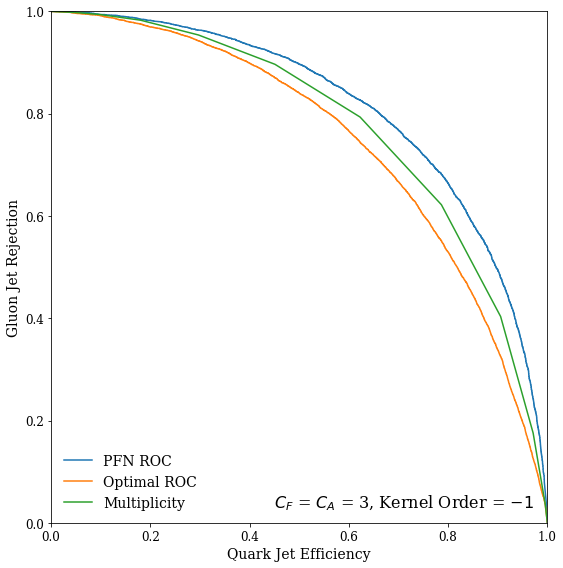

In [12]:
plot_rocs(pfn_out,optimal_roc,mult_roc)

In [4]:
fname_gg = base_dir+'H2qq-CF3.0CA3.0-sq0100-esq0000/total.root'
fname_qq = base_dir+'H2qq-CF3.0CA3.0-sq0100-esq0011/total.root'
X, Y = pre_process(fname_qq,fname_gg,nev_max=75000)
optimal = np.array([np.sum([p[0] + p[0]**2 if p[0] > 0 else 0 for p in jet]) for jet in X])
optimal_roc = roc_curve(Y[:,1],optimal)
optimal_auc = roc_auc_score(Y[:,1],optimal)
mults = np.array([np.sum([1 if p[0] > 0 else 0 for p in jet]) for jet in X])
mult_roc = roc_curve(Y[:,1],mults)
mult_auc = roc_auc_score(Y[:,1],mults)
print("Optimal AUC: "+str(optimal_auc))
print("Multiplicity AUC: "+str(mult_auc))
pfn_out = train_qg_pfn(fname_qq,fname_gg,n_epoch=3,nev_max=75000)

Loaded files at 0.1766808032989502
Read in arrays at 3.1873271465301514
Limited max events at 3.1876418590545654
Cleaned events at 3.321805953979492
Made quark/gluon input arrays at 6.5271875858306885
Finished preprocessing at 17.701109170913696
Optimal AUC: 0.5207538736883502
Multiplicity AUC: 0.4779983578320144
Loaded files at 0.14417266845703125
Read in arrays at 3.1054773330688477
Limited max events at 3.105834722518921
Cleaned events at 3.2370598316192627
qmaxmult = 8, gmaxmult = 7
Made quark/gluon input arrays at 6.435012340545654
Finished preprocessing at 17.588072538375854
Done train/val/test split at 17.611889600753784
Model summary:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 3)      0                                            
____________________________________________________

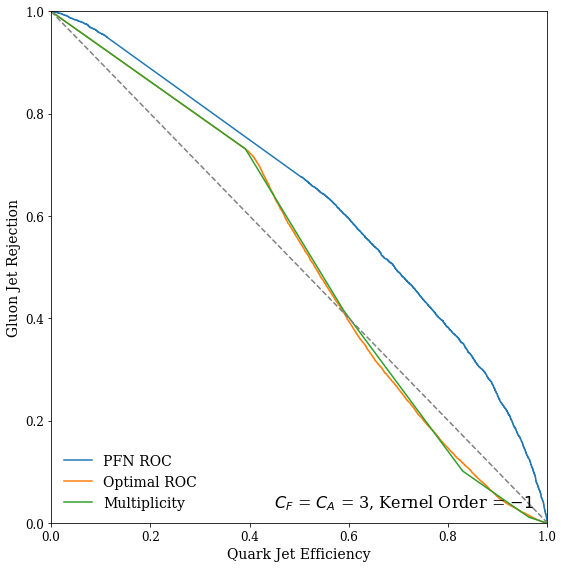

In [37]:
mult_roc = roc_curve(Y[:,1],-mults)
optimal_roc = roc_curve(Y[:,1],optimal)
plot_rocs(pfn_out,optimal_roc,mult_roc)

(array([0.00000000e+00, 2.68775551e-01, 3.16091415e-01, 3.13839555e-01,
        9.01414114e-02, 1.07097380e-02, 4.28925675e-04, 1.34039274e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 1 Patch objects>)

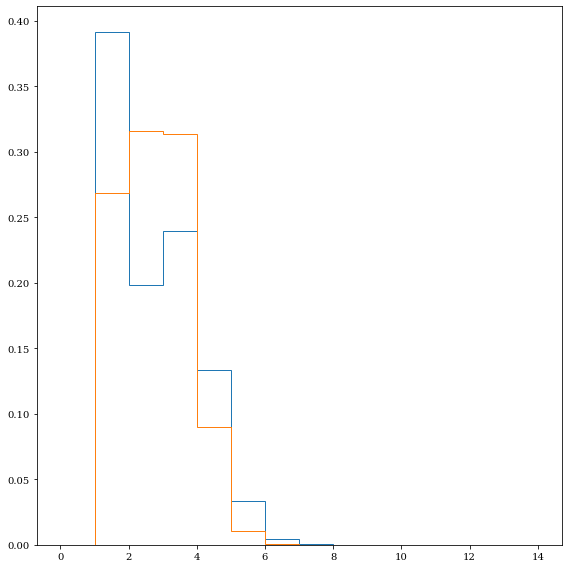

In [38]:
labels = Y[:,1]
q_mask = labels.astype(bool)
g_mask = (1-labels).astype(bool)
vals,bins,patch = plt.hist(mults[q_mask],bins=np.arange(0,15),density=True,log=False,histtype='step')
plt.hist(mults[g_mask],bins=bins,density=True,log=False,histtype='step')

(array([0.00000000e+00, 3.14430839e-03, 7.86077099e-04, 1.96519275e-02,
        5.26671656e-02, 7.31051702e-02, 2.96351066e-01, 4.97586803e-01,
        5.91916055e-01, 6.51657915e-01, 8.00226486e-01, 2.06266631e+00,
        1.96519275e+00, 1.92746105e+00, 1.76552916e+00, 1.67670245e+00,
        1.65312014e+00, 1.54228327e+00, 1.34497792e+00, 1.17361311e+00,
        2.88490295e+00, 2.98945121e+00, 2.06030808e+00, 1.60281120e+00,
        1.43616286e+00, 1.31825129e+00, 1.13195102e+00, 9.65302677e-01,
        8.83550659e-01, 7.89221407e-01, 8.19878414e-01, 7.83718867e-01,
        7.46773244e-01, 6.66593380e-01, 6.61876917e-01, 5.46323584e-01,
        6.15498368e-01, 5.25885579e-01, 5.13308345e-01, 4.62213334e-01,
        4.14262631e-01, 3.52948617e-01, 3.41943538e-01, 3.22291610e-01,
        2.41325669e-01, 2.08310431e-01, 1.98877506e-01, 1.38349569e-01,
        1.02190023e-01, 1.58221598e+01]),
 array([1.1474165 , 1.16446817, 1.18151984, 1.19857151, 1.21562318,
        1.23267485, 1.2497

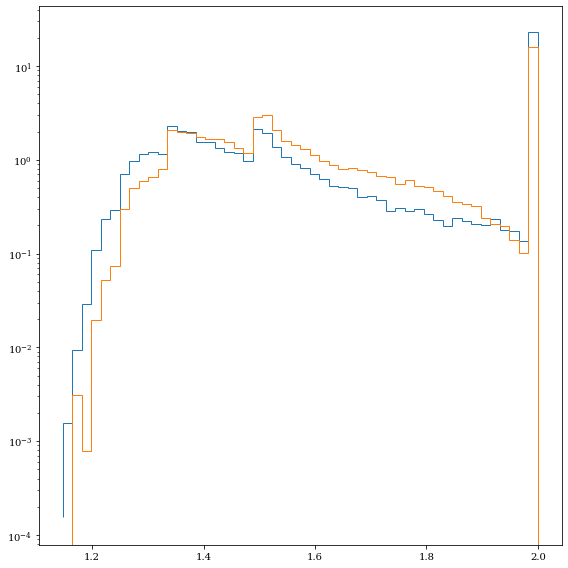

In [36]:
vals,bins,patch = plt.hist(optimal[q_mask],bins=50,density=True,log=True,histtype='step')
plt.hist(optimal[g_mask],bins=bins,density=True,log=True,histtype='step')